<a href="https://colab.research.google.com/github/jonatahpfg/Machine-learning-estudos/blob/main/Predi%C3%A7%C3%A3o_de_pre%C3%A7o_de_resid%C3%AAncias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv('/content/kc_house_data.csv.zip')

In [24]:
display(df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [23]:
limite_price = 7000000
df = df[df['price'] <= limite_price]

bedrooms_limite = 7
df = df[df['bedrooms'] <= bedrooms_limite]


bathrooms_limite = 6
df = df[(df['bathrooms'] < bathrooms_limite) & (df['bathrooms'] >= 1)]


sqft_living_limite = 7000
df = df[df['sqft_living'] <= sqft_living_limite]

sqft_lot_limite = 70000
df = df[df['sqft_lot'] <= sqft_lot_limite]

sqft_above_limite = 7000
df = df[df['sqft_above'] <= sqft_above_limite]

floors_limite = 3
df = df[df['floors']<=floors_limite]


In [16]:
X = df.drop(['id', 'date', 'price'], axis=1)
y = df['price']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=2)

model = LinearRegression()

model.fit( x_train,y_train)

y_pred = model.predict(x_test)

score = model.score(x_test, y_test)*100

print(f"Pontuação do modelo: {score}%")

Pontuação do modelo: 71.11084585875741%


In [22]:
from sklearn.metrics import r2_score
print('LineRegression r2_score :', r2_score(y_test, y_pred)*100,'%')

LineRegression r2_score : 71.11084585875741 %


In [19]:
from sklearn.ensemble import RandomForestRegressor

rfg_model = RandomForestRegressor()
rfg_model.fit(x_train, y_train)

print(rfg_model.score(x_test, y_test)*100,"%")

86.66872868113981 %


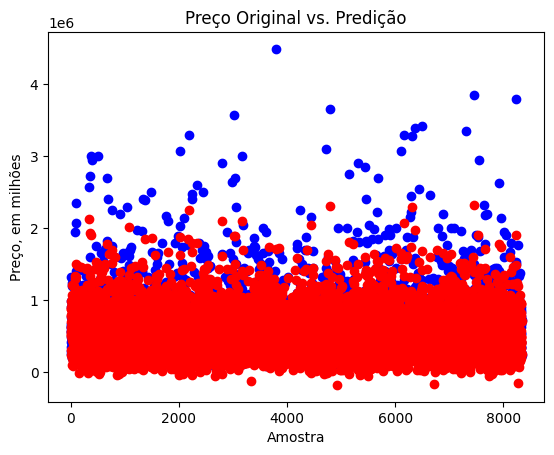

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plotar os valores de y_test em azul (preço original das casas)
ax.scatter(range(len(y_test)), y_test, color='blue', label='Preço Original')

# Plotar os valores de y_pred em vermelho (predição)
ax.scatter(range(len(y_pred)), y_pred, color='red', label='Predição')



ax.set_xlabel('Amostra')
ax.set_ylabel('Preço, em milhões')
ax.set_title('Preço Original vs. Predição')
plt.show()

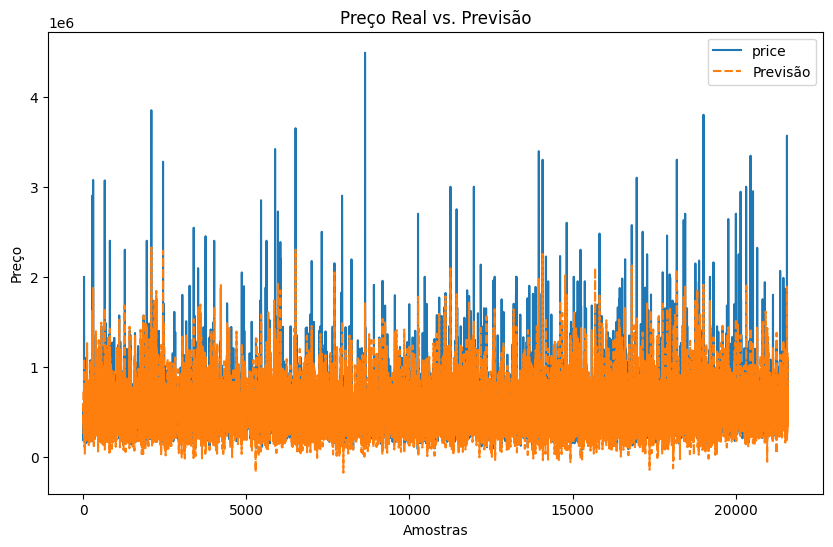

,price,Previsão
1545,250000.0,304054.478521
18358,418000.0,556478.708653
3869,1325000.0,901446.014141
4994,637000.0,878704.468772
2248,990000.0,986205.356365
...,...,...
13313,667000.0,576999.708973
6495,865000.0,966812.699647
5571,334000.0,469277.269584
305,725000.0,713456.636773


In [27]:
resultados = pd.DataFrame({'price': y_test, 'Previsão': y_pred})

import seaborn as sns
# Plotar os resultados
plt.figure(figsize=(10, 6))
sns.lineplot(data=resultados)
plt.title('Preço Real vs. Previsão')
plt.xlabel('Amostras')
plt.ylabel('Preço')
plt.show()

display(resultados)